<h3> Data Exploration </h3>

In [1]:
#Importing Essential Libraries
import pandas as pd 
import numpy as np

#Libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt 

#Libraries for Data Exploration - Machine Learning
from scipy.stats import norm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading the Dataset

df = pd.read_csv ('/Users/michael/Desktop/Data Science Project/bank+marketing/bank/bank.csv', sep=';')  # & Defining the correct delimiter

In [3]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [4]:
df.shape

(4521, 17)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
df.corr(numeric_only=True)

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


In [8]:
df["job"].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [9]:
df.job.value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

In [10]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [11]:
df.marital.value_counts()

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

In [12]:
df["education"].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [13]:
df.education.value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

In [14]:
df["y"].value_counts()

# To Y einai arketa imbalanced

y
no     4000
yes     521
Name: count, dtype: int64

In [15]:
#Searching for null values

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<h3> Descriptive Statistics </h3>

In [16]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


<h3> First Look On Visualizations </h3>

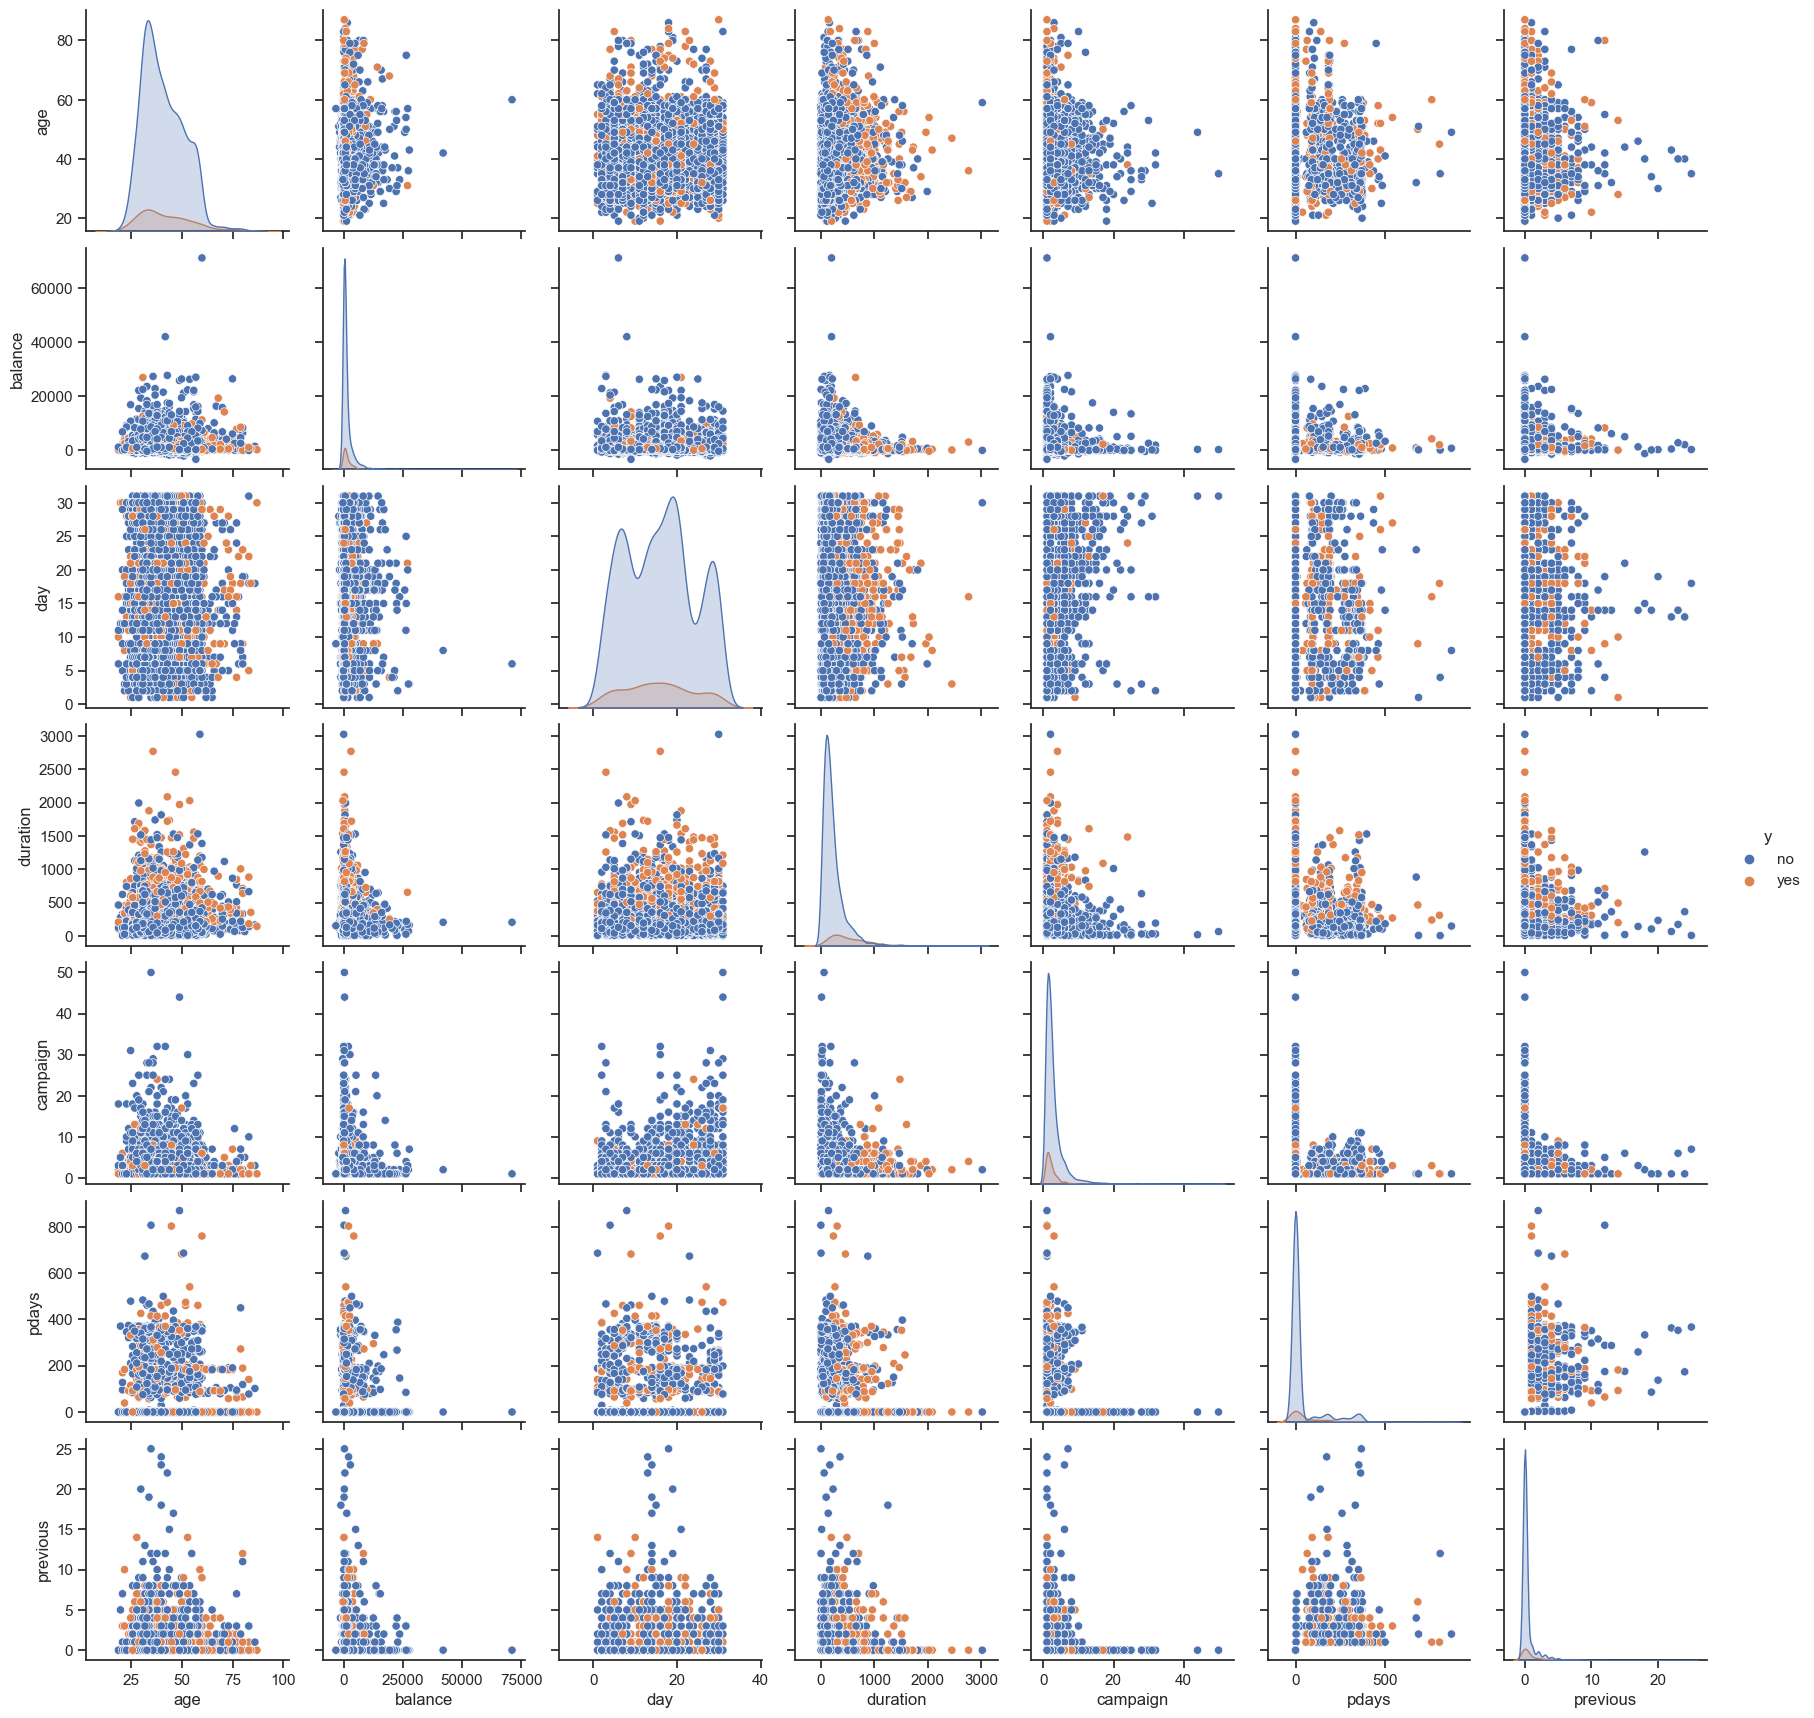

In [17]:
# Visualizations
sns.set(style="ticks")
sns.pairplot(df, hue="y")
plt.show()

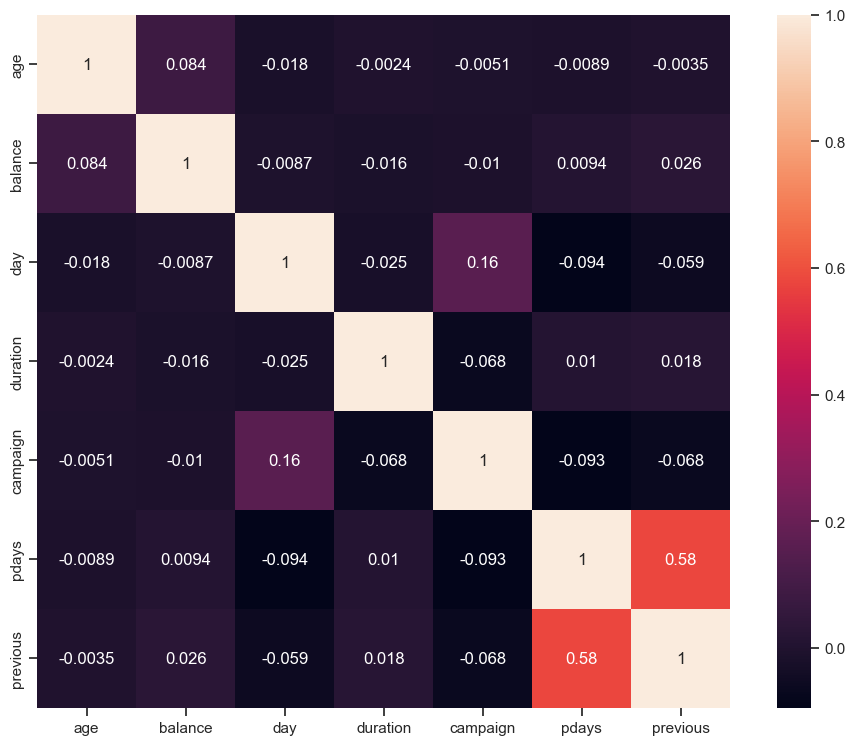

In [18]:
#correlation matrix
corrmat = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True)
plt.show()

<h3> Data Manipulation </h3>

In [19]:
#Creating a copy of the dataset before manipulating the data
df2 = df.copy()

In [20]:
#Dropping 'day' & 'month' columns as 'pdays' gives the number of days that passed by after the client was last contacted from a previous campaign
df2.drop(["day","month"],axis =1, inplace = True)

In [21]:
#There are many unknown entries, so we replace them as null values
for i in df2.columns:
    df2[i] = np.where(df2[i] == "unknown", np.nan, df2[i])

In [22]:
df2.isnull().sum()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

In [23]:
#Poutcome has 3705 null values which is 81.9% of unknown  values, so it will not be useful for the analysis
#Simillar with contact.

df2.drop("poutcome", inplace = True, axis = 1)
df2.drop("contact", inplace = True, axis = 1)

In [24]:
df2.head(100)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30.0,unemployed,married,primary,no,1787.0,no,no,79.0,1.0,-1.0,0.0,no
1,33.0,services,married,secondary,no,4789.0,yes,yes,220.0,1.0,339.0,4.0,no
2,35.0,management,single,tertiary,no,1350.0,yes,no,185.0,1.0,330.0,1.0,no
3,30.0,management,married,tertiary,no,1476.0,yes,yes,199.0,4.0,-1.0,0.0,no
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,226.0,1.0,-1.0,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,41.0,NaN,single,tertiary,no,1567.0,no,no,291.0,2.0,-1.0,0.0,no
96,41.0,admin.,married,tertiary,no,5426.0,yes,no,149.0,2.0,-1.0,0.0,no
97,30.0,admin.,single,tertiary,no,261.0,no,no,233.0,1.0,137.0,20.0,no
98,36.0,blue-collar,divorced,secondary,no,2843.0,no,no,473.0,1.0,182.0,1.0,no


In [25]:
#Using fillna command of pandas library. (It means that missing values will be replaced with the most recent non-missing value before them in the column.)
df2['job'].fillna(method = "ffill",inplace=True)
df2['education'].fillna(method = "ffill",inplace=True)

In [26]:
df2.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [27]:
df2.head(100)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30.0,unemployed,married,primary,no,1787.0,no,no,79.0,1.0,-1.0,0.0,no
1,33.0,services,married,secondary,no,4789.0,yes,yes,220.0,1.0,339.0,4.0,no
2,35.0,management,single,tertiary,no,1350.0,yes,no,185.0,1.0,330.0,1.0,no
3,30.0,management,married,tertiary,no,1476.0,yes,yes,199.0,4.0,-1.0,0.0,no
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,226.0,1.0,-1.0,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,41.0,blue-collar,single,tertiary,no,1567.0,no,no,291.0,2.0,-1.0,0.0,no
96,41.0,admin.,married,tertiary,no,5426.0,yes,no,149.0,2.0,-1.0,0.0,no
97,30.0,admin.,single,tertiary,no,261.0,no,no,233.0,1.0,137.0,20.0,no
98,36.0,blue-collar,divorced,secondary,no,2843.0,no,no,473.0,1.0,182.0,1.0,no


In [28]:
#Converting all categorical data to numerical data in order to help with building ML models later.

#Replacing yes and no as 1 & 0 respectively.

var_yes_no = ['default','housing','loan','y']

In [29]:
# Mapping dictionary
mapping = {'yes': 1, 'no': 0}

# Applying the mapping to the 'target' column
df2[var_yes_no] = df2[var_yes_no ].applymap(lambda x: mapping.get(x, x))

In [30]:
df2.head(100)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30.0,unemployed,married,primary,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0
1,33.0,services,married,secondary,0,4789.0,1,1,220.0,1.0,339.0,4.0,0
2,35.0,management,single,tertiary,0,1350.0,1,0,185.0,1.0,330.0,1.0,0
3,30.0,management,married,tertiary,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0
4,59.0,blue-collar,married,secondary,0,0.0,1,0,226.0,1.0,-1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,41.0,blue-collar,single,tertiary,0,1567.0,0,0,291.0,2.0,-1.0,0.0,0
96,41.0,admin.,married,tertiary,0,5426.0,1,0,149.0,2.0,-1.0,0.0,0
97,30.0,admin.,single,tertiary,0,261.0,0,0,233.0,1.0,137.0,20.0,0
98,36.0,blue-collar,divorced,secondary,0,2843.0,0,0,473.0,1.0,182.0,1.0,0


<h3> More Visualizations </h3>

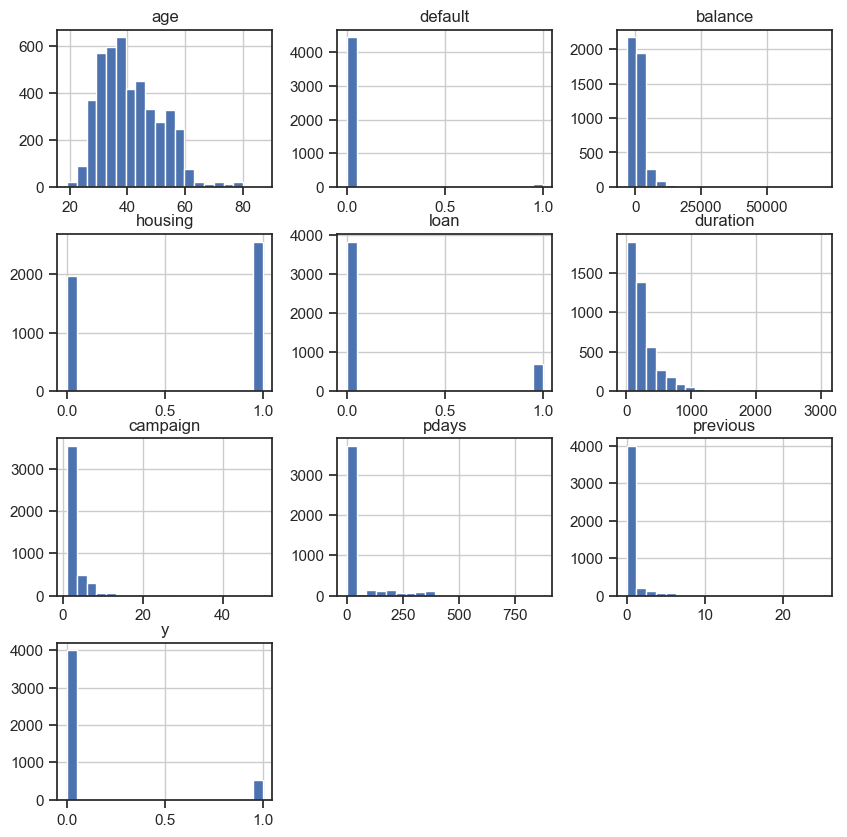

In [31]:
#Histograms for Numerical Features:
df2.hist(figsize=(10, 10), bins=20)
plt.show()

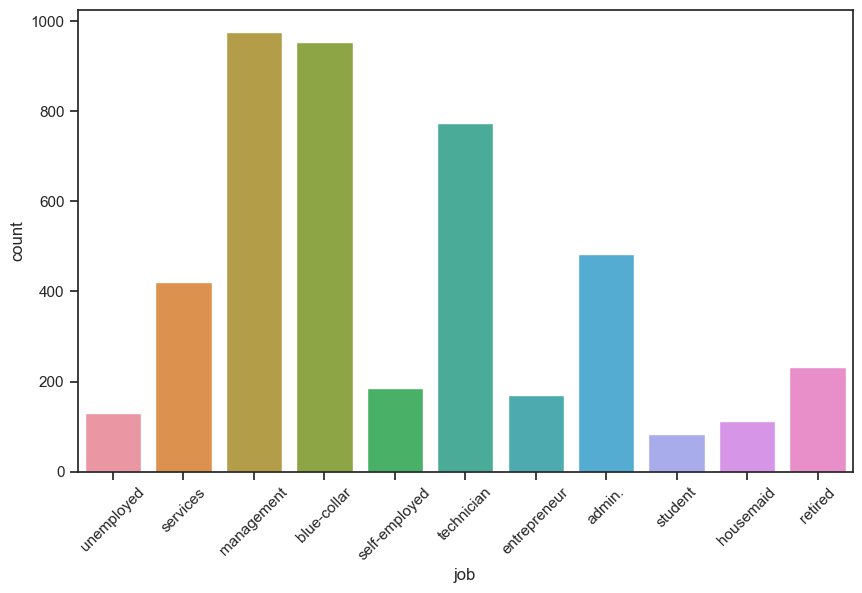

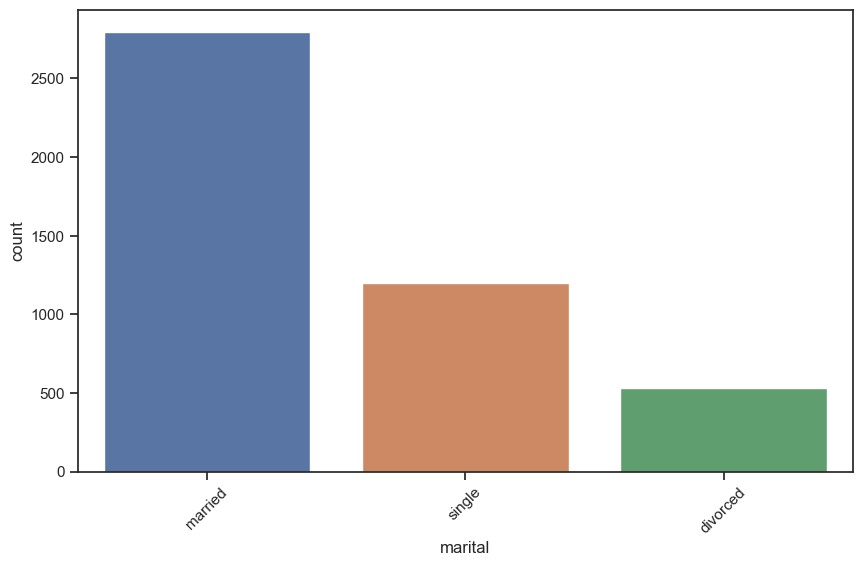

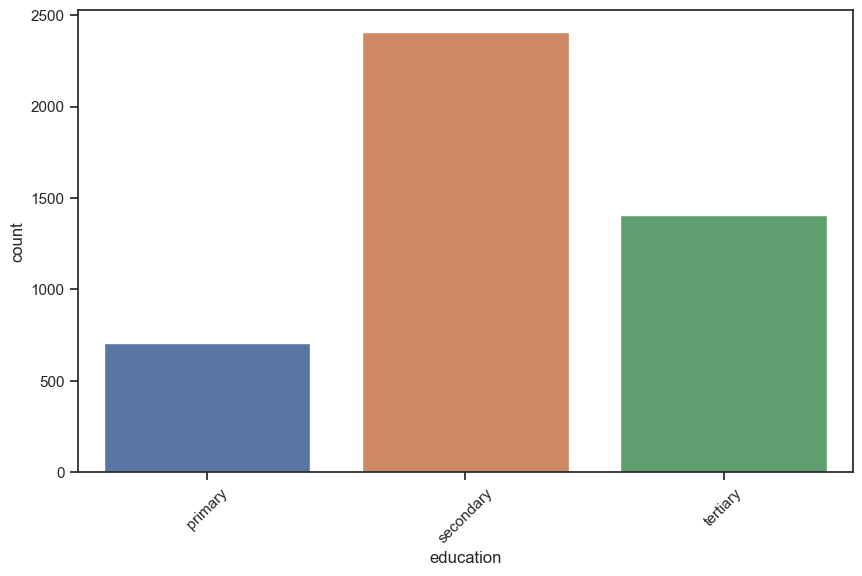

In [32]:
# Bar Plots for Categorical Features
categorical_features = df2.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df2)
    plt.xticks(rotation=45)
    plt.show()


<h3> Handling Categorical Values </h3>

In [33]:
df2

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30.0,unemployed,married,primary,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0
1,33.0,services,married,secondary,0,4789.0,1,1,220.0,1.0,339.0,4.0,0
2,35.0,management,single,tertiary,0,1350.0,1,0,185.0,1.0,330.0,1.0,0
3,30.0,management,married,tertiary,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0
4,59.0,blue-collar,married,secondary,0,0.0,1,0,226.0,1.0,-1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,services,married,secondary,0,-333.0,1,0,329.0,5.0,-1.0,0.0,0
4517,57.0,self-employed,married,tertiary,1,-3313.0,1,1,153.0,1.0,-1.0,0.0,0
4518,57.0,technician,married,secondary,0,295.0,0,0,151.0,11.0,-1.0,0.0,0
4519,28.0,blue-collar,married,secondary,0,1137.0,0,0,129.0,4.0,211.0,3.0,0


In [34]:
categorical_cols = ['job','marital','education']

In [35]:
#Applying One Hot Encoding to convert categorical values to numerical in a new dataset

df3 = pd.get_dummies(df2, columns=categorical_cols, drop_first=True)

In [36]:
df3.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary
0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0,...,False,False,False,False,False,True,True,False,False,False
1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,0,...,False,False,True,False,False,False,True,False,True,False
2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,0,...,False,False,False,False,False,False,False,True,False,True
3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0,...,False,False,False,False,False,False,True,False,False,True
4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,0,...,False,False,False,False,False,False,True,False,True,False


In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4521 non-null   float64
 1   default              4521 non-null   int64  
 2   balance              4521 non-null   float64
 3   housing              4521 non-null   int64  
 4   loan                 4521 non-null   int64  
 5   duration             4521 non-null   float64
 6   campaign             4521 non-null   float64
 7   pdays                4521 non-null   float64
 8   previous             4521 non-null   float64
 9   y                    4521 non-null   int64  
 10  job_blue-collar      4521 non-null   bool   
 11  job_entrepreneur     4521 non-null   bool   
 12  job_housemaid        4521 non-null   bool   
 13  job_management       4521 non-null   bool   
 14  job_retired          4521 non-null   bool   
 15  job_self-employed    4521 non-null   b

In [38]:
#Converting True to 1 and False to 0
bool_cols = df3.select_dtypes(include='bool').columns

In [39]:
# Mapping dictionary
bool_mapping = {True: 1, False: 0}

# Applying the mapping to boolean columns
df3[bool_cols] = df3[bool_cols].applymap(lambda x: bool_mapping.get(x, x))

In [40]:
df3.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary
0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0,...,0,0,0,0,0,1,1,0,0,0
1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,0,...,0,0,1,0,0,0,1,0,1,0
2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,0,...,0,0,0,0,0,0,0,1,0,1
3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0,...,0,0,0,0,0,0,1,0,0,1
4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,0,...,0,0,0,0,0,0,1,0,1,0


<h3>2nd Sub Task </h3>

<h3>Building Machine Learning Models </h3>

In [41]:
#X contains features and y contains the target variable
X = df3.drop('y', axis=1)
X


,age,default,balance,housing,loan,duration,campaign,pdays,previous,job_blue-collar,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary
0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0,...,0,0,0,0,0,1,1,0,0,0
1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,0,...,0,0,1,0,0,0,1,0,1,0
2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,0,...,0,0,0,0,0,0,0,1,0,1
3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0,...,0,0,0,0,0,0,1,0,0,1
4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,0,-333.0,1,0,329.0,5.0,-1.0,0.0,0,...,0,0,1,0,0,0,1,0,1,0
4517,57.0,1,-3313.0,1,1,153.0,1.0,-1.0,0.0,0,...,0,1,0,0,0,0,1,0,0,1
4518,57.0,0,295.0,0,0,151.0,11.0,-1.0,0.0,0,...,0,0,0,0,1,0,1,0,1,0
4519,28.0,0,1137.0,0,0,129.0,4.0,211.0,3.0,1,...,0,0,0,0,0,0,1,0,1,0


In [42]:
y = df3['y']
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [43]:
# Splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<h3>Decision Tree Model </h3>

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn import tree


# X = features and y = target variable
X = df3.drop('y', axis=1)
y = df3['y']

# Creating a Decision Tree model
dt_clf = tree.DecisionTreeClassifier()

# Training the model
dt_clf.fit(X_train, y_train)

# Making predictions (with test dataset)
y_pred = dt_clf.predict(X_test)

Confusion Matrix:
[[707  96]
 [ 60  42]]
Accuracy = 0.8276243093922652
Precision = 0.6130604840995408
Recall = 0.646106512343418
F-score = 0.6253184713375796
Support = None


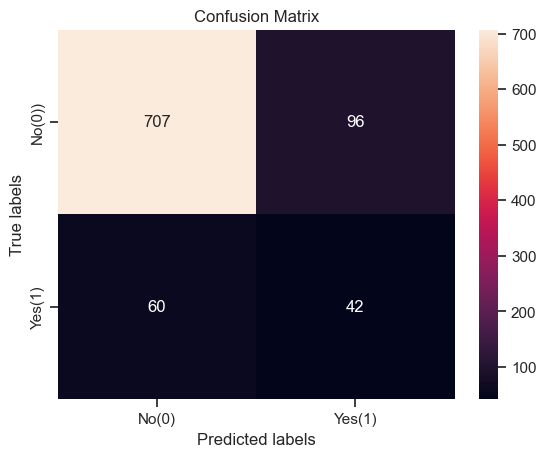

In [45]:
# Evaluating the model
dt_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(dt_cm)

#Printing Accurracy
print('Accuracy = ' + str(dt_clf.score(X_test,y_test)))

dt_clf_metrics = precision_recall_fscore_support(y_test, y_pred, average='macro')
dt_clf_metrics_labels = ['Precision', 'Recall', 'F-score', 'Support']

for i in range(0,len(dt_clf_metrics)):
    print(dt_clf_metrics_labels[i] + ' = ' + str(dt_clf_metrics[i]))


ax= plt.subplot()
sns.heatmap(dt_cm, annot=True, fmt='g', ax = ax); 

#Confusion Matrix Visualization:
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No(0)', 'Yes(1)'])
ax.yaxis.set_ticklabels(['No(0))', 'Yes(1)'])

plt.show()

In [46]:
#Rerunning Model with different parametres. Trying to Improve the Score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn import tree


# Assuming X contains your features and y contains your target variable
X = df3.drop('y', axis=1)
y = df3['y']

# Create a Decision Tree model with different parametres
dt2_clf = tree.DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=5, min_samples_leaf=10)

# Train the model
dt2_clf.fit(X_train, y_train)

# Making predictions (with test dataset)
y_pred = dt2_clf.predict(X_test)


Confusion Matrix:
[[774  29]
 [ 74  28]]
Accuracy = 0.8861878453038674
Precision = 0.7019819596160212
Recall = 0.6191976167802115
F-score = 0.6449074126982314
Support = None


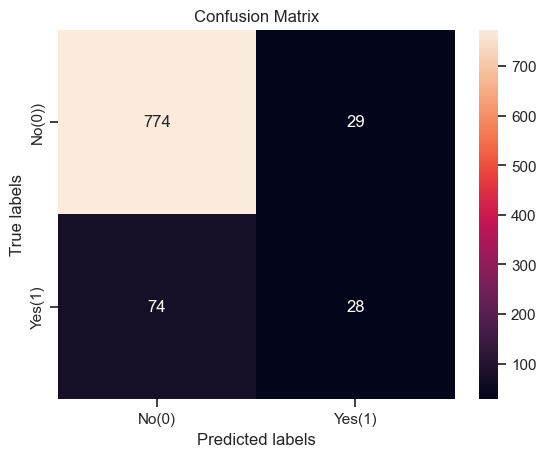

In [47]:
# Evaluating the model
dt2_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(dt2_cm)

#Printing Accurracy
print('Accuracy = ' + str(dt2_clf.score(X_test,y_test)))

dt2_clf_metrics = precision_recall_fscore_support(y_test, y_pred, average='macro')
dt2_clf_metrics_labels = ['Precision', 'Recall', 'F-score', 'Support']

for i in range(0,len(dt2_clf_metrics)):
    print(dt2_clf_metrics_labels[i] + ' = ' + str(dt2_clf_metrics[i]))


ax= plt.subplot()
sns.heatmap(dt2_cm, annot=True, fmt='g', ax = ax); 

#Confusion Matrix Visualization:
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No(0)', 'Yes(1)'])
ax.yaxis.set_ticklabels(['No(0))', 'Yes(1)'])

plt.show()

In [48]:
#'No' (0): The client did not subscribe to a term deposit.
#'Yes' (1): The client subscribed to a term deposit.

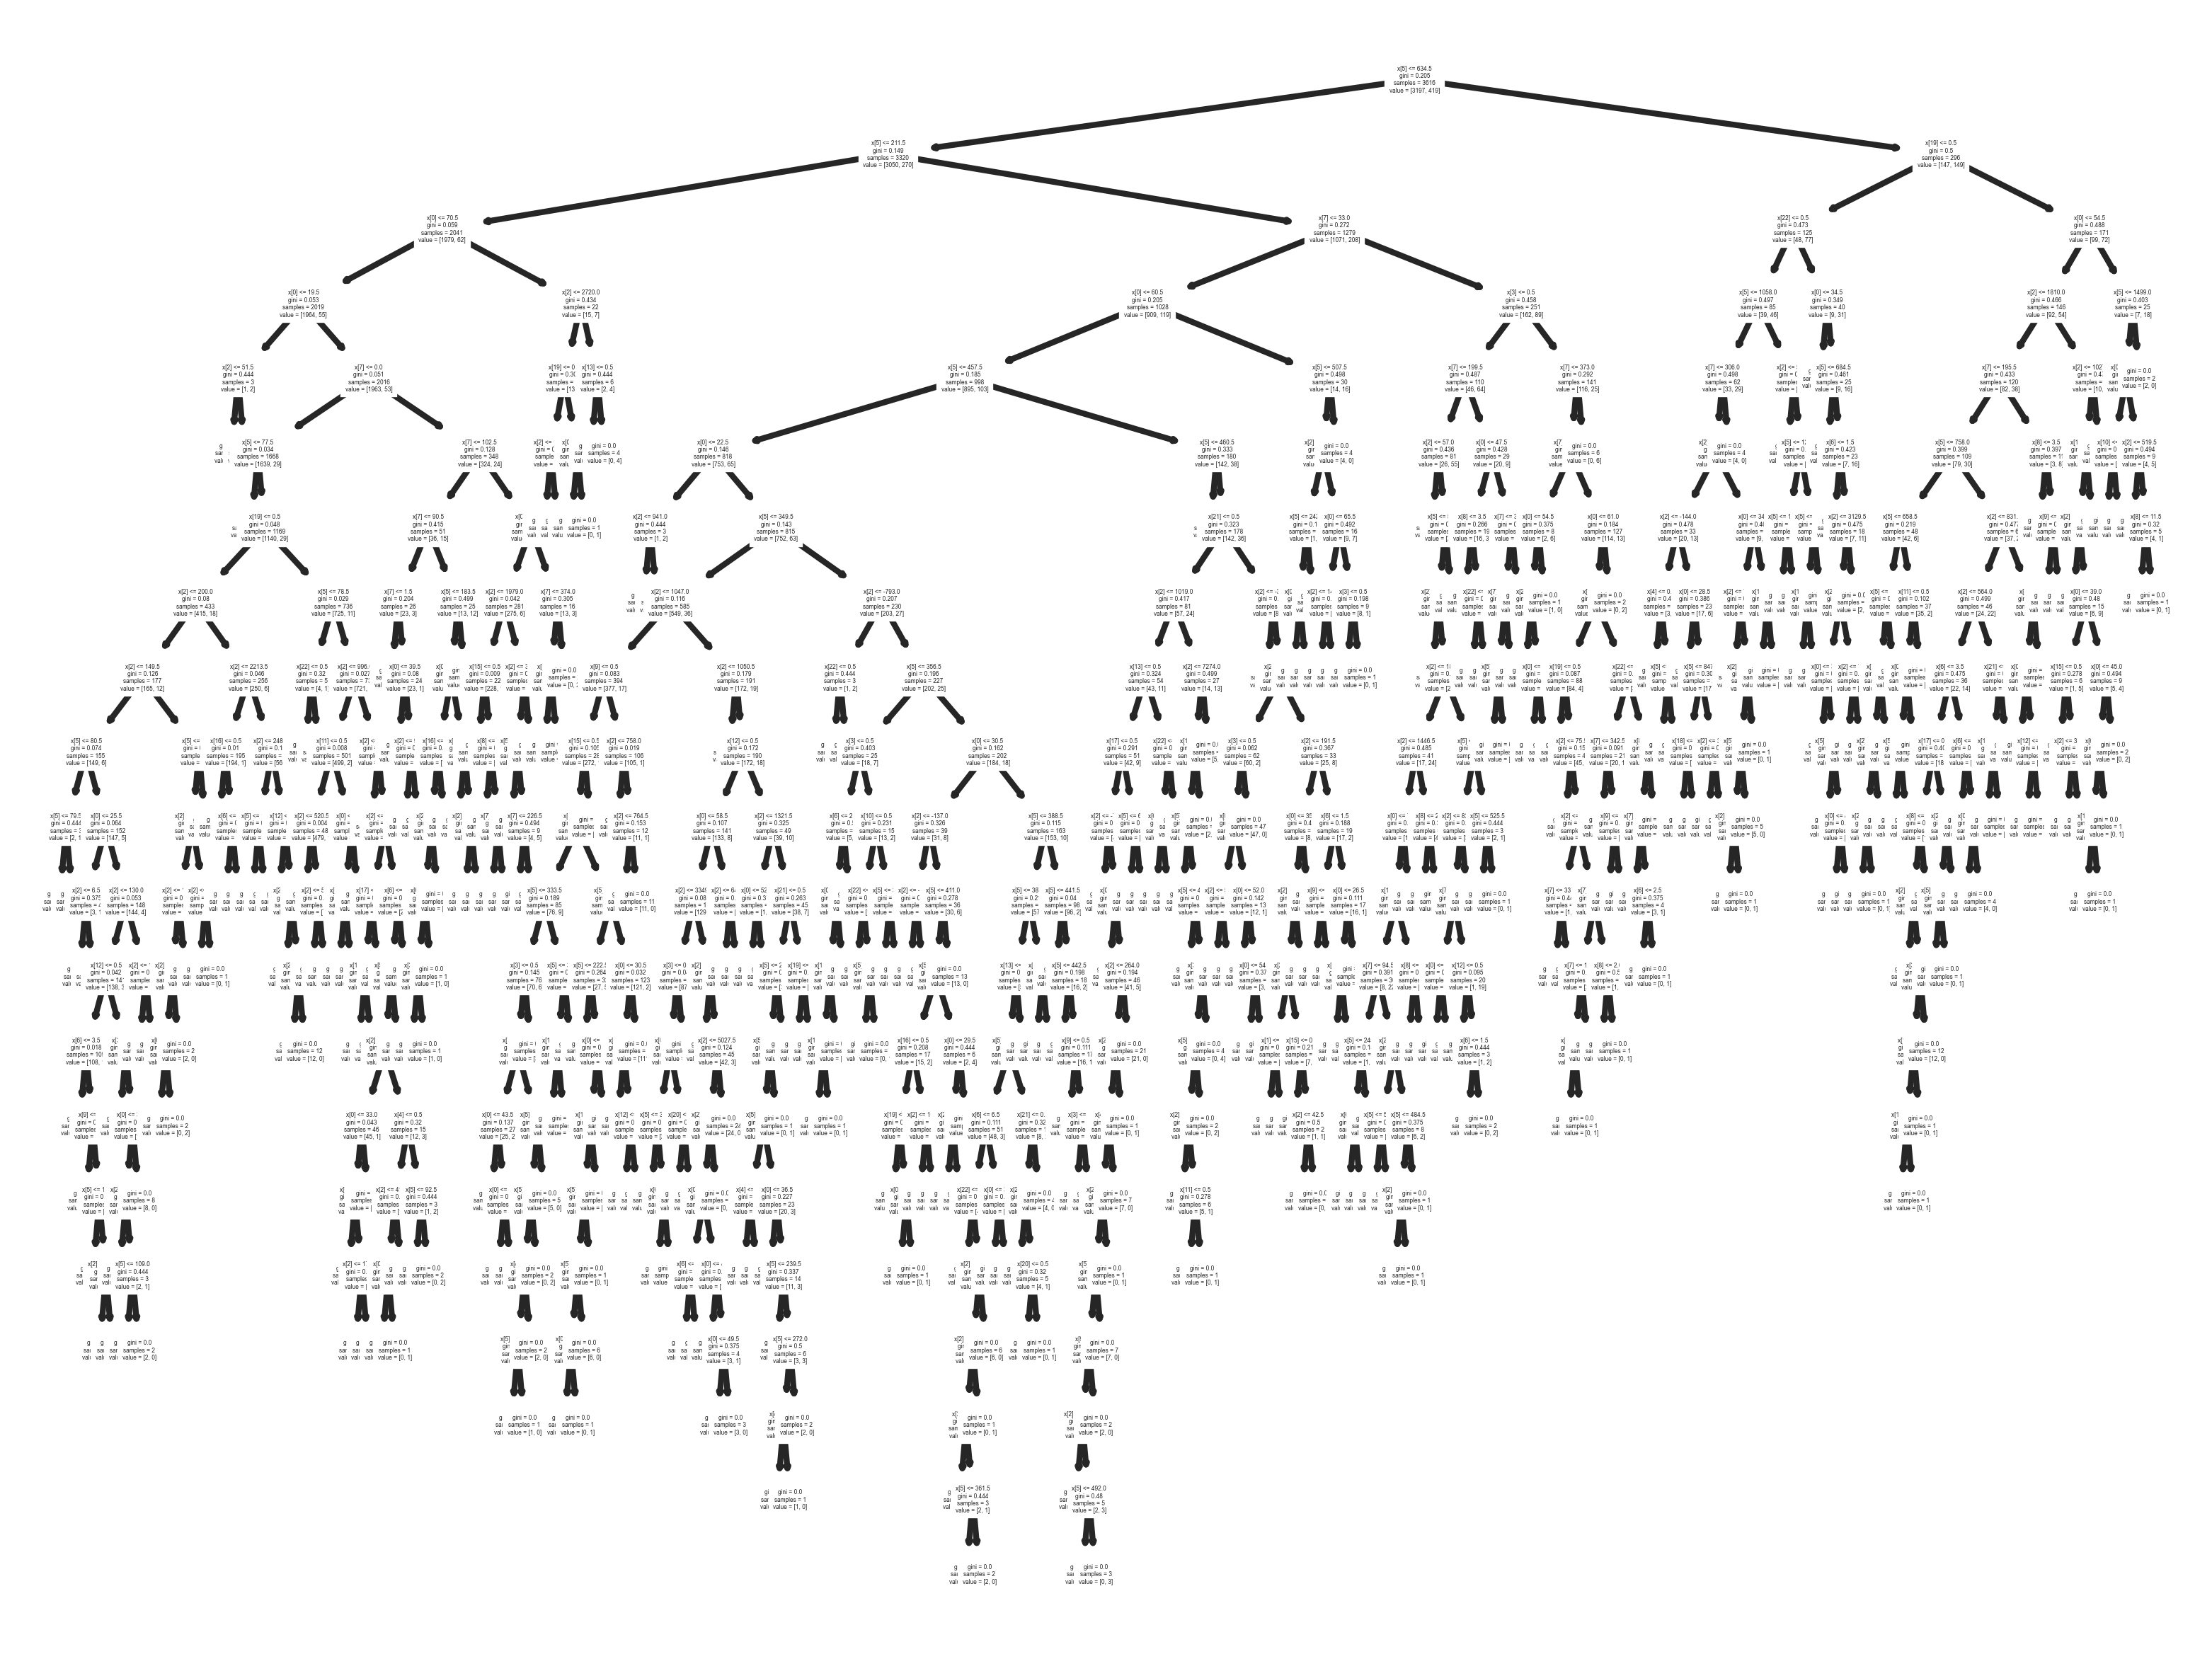

In [49]:
#Visualizing the decision tree 1 model
fig, axes = plt.subplots(dpi=600)
tree.plot_tree(dt_clf)

plt.show()

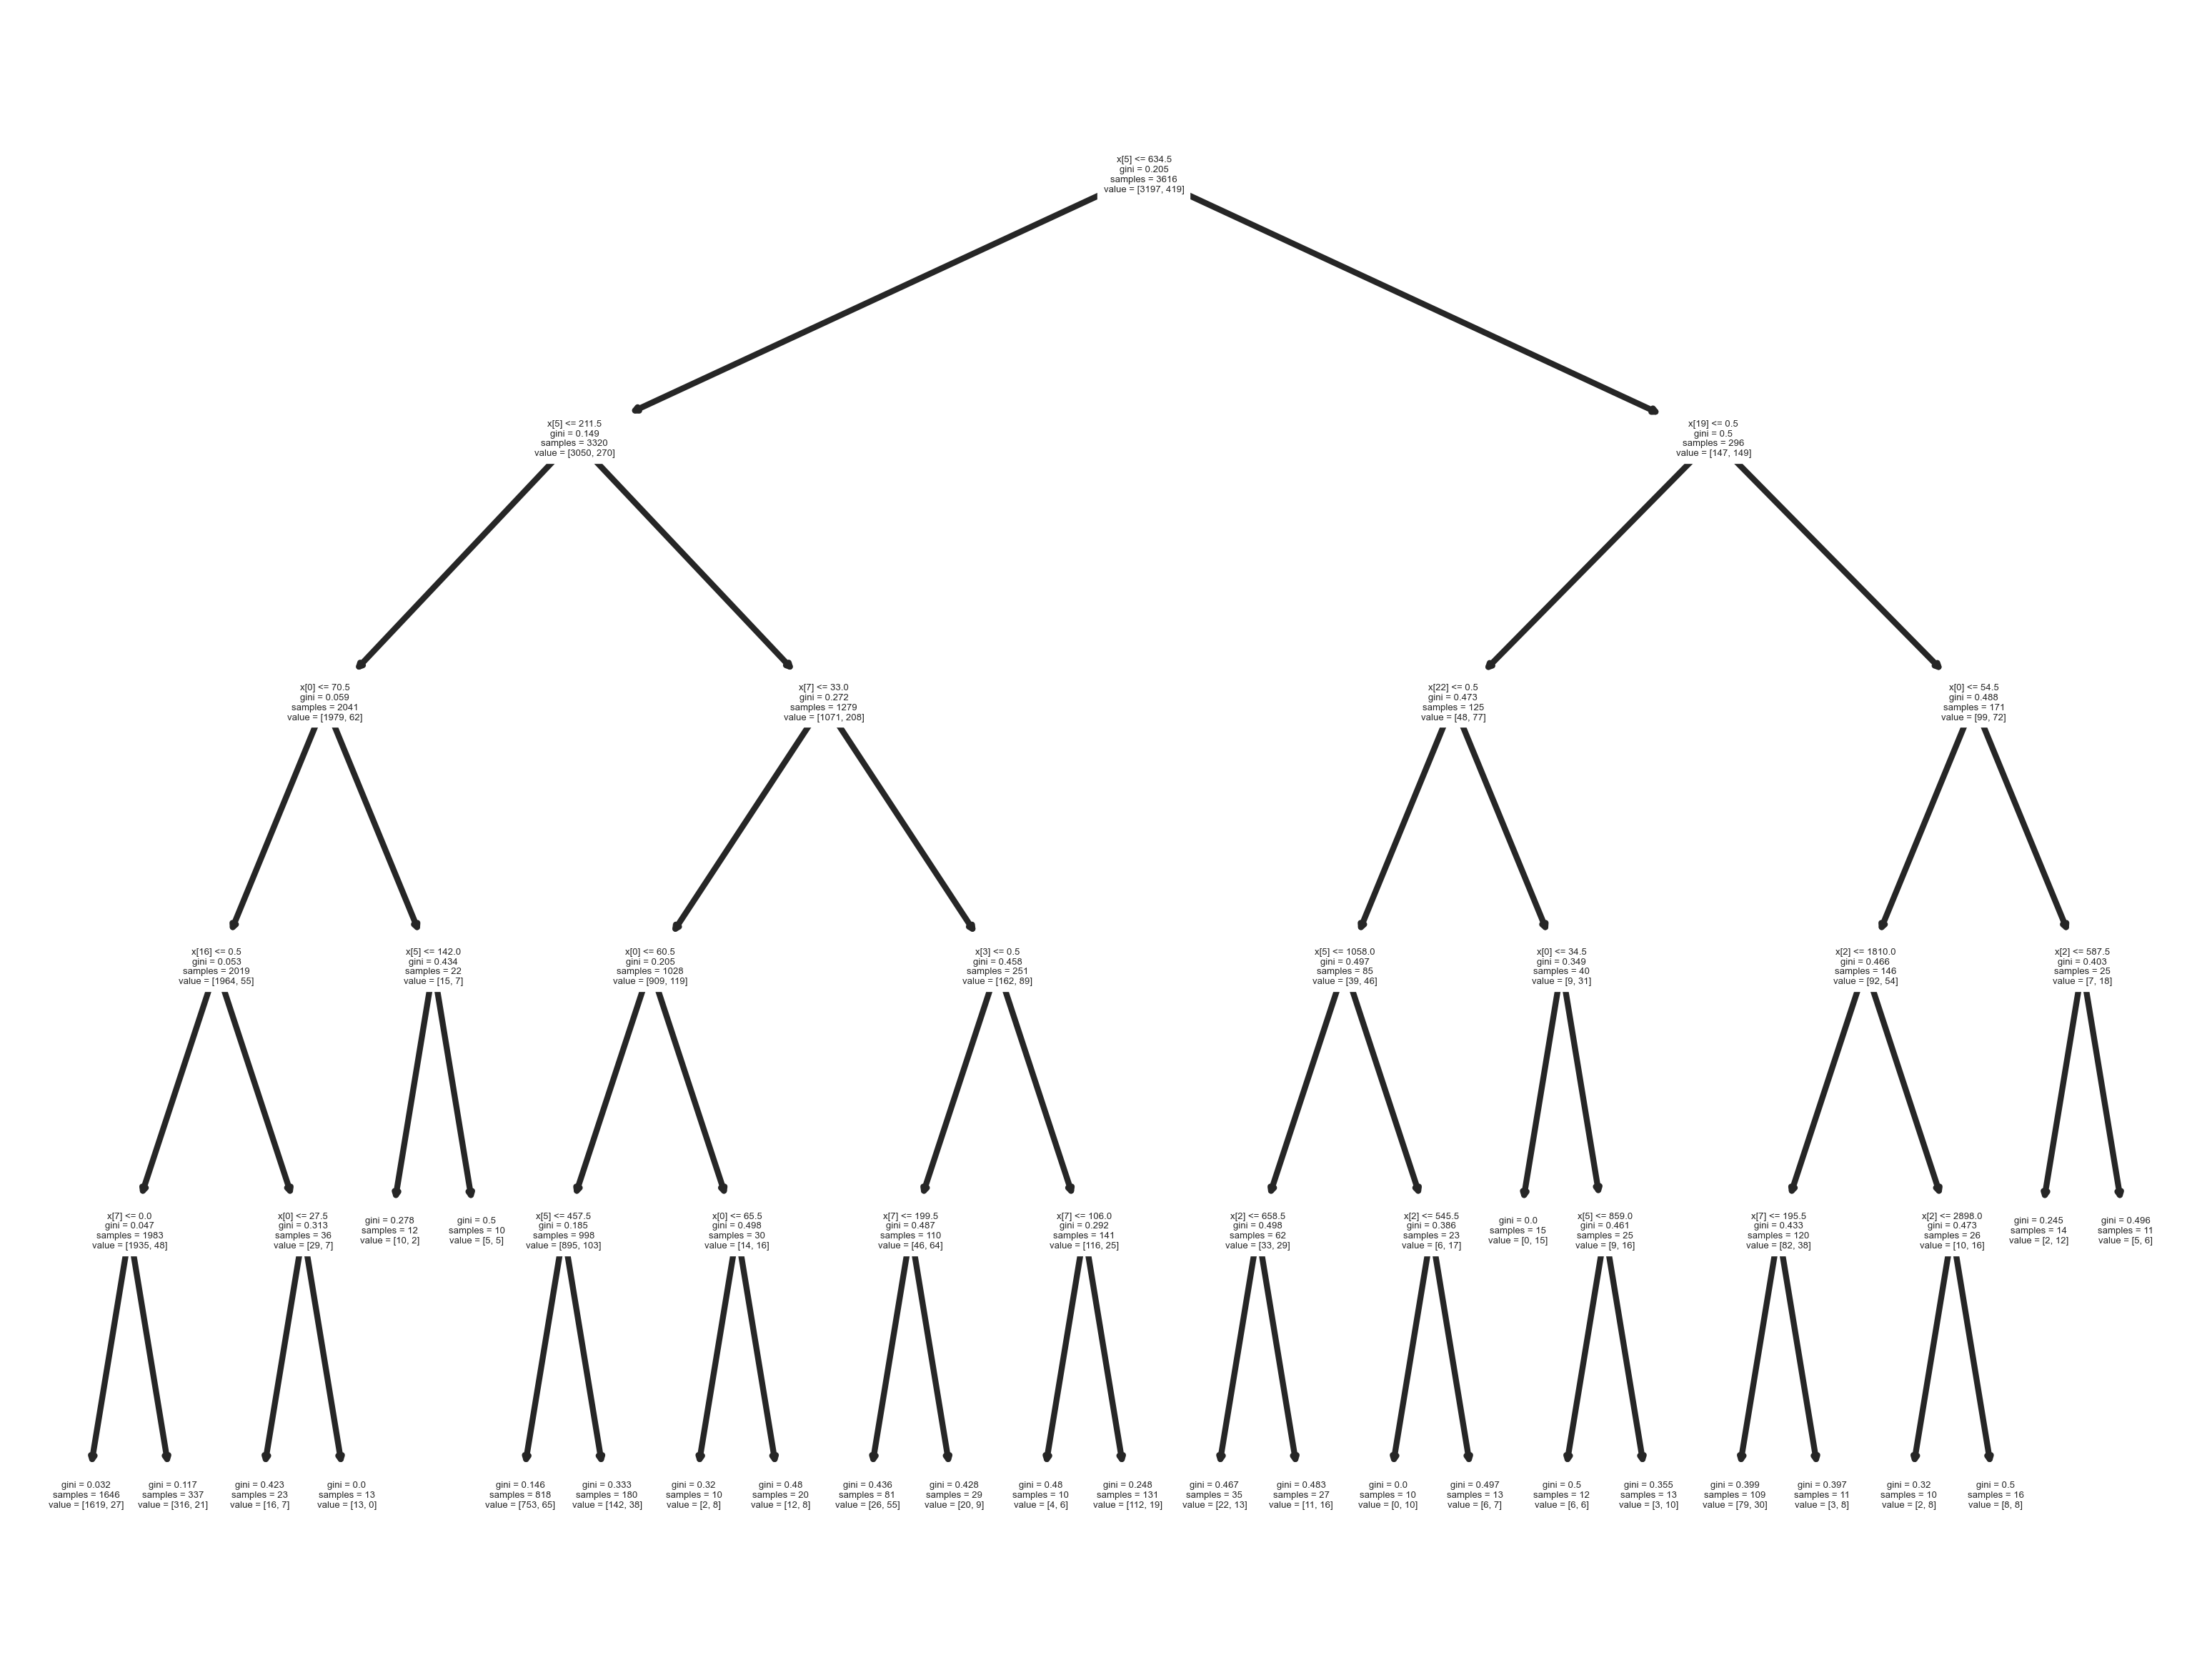

In [50]:
#Visualizing the decision tree 2 model
fig, axes = plt.subplots(dpi=600)
tree.plot_tree(dt2_clf)

plt.show()

<h3> Principal Component Analysis (PCA) </h3>

Explained Variance Ratio:
[0.9914995  0.00738972]
Singular Values:
[202341.02935904  17468.34313946]
Principal Components:
[[ 2.94556900e-04 -3.02826610e-06  9.99998944e-01 -8.27232997e-06
  -8.53147941e-06 -1.38746947e-03 -1.03007242e-05  3.14233588e-04
   1.47431646e-05 -7.61691721e-06  8.99428823e-07  1.78108839e-06
   8.25866998e-06  5.09096178e-06 -1.82057799e-07 -3.27943466e-06
   2.48628353e-07 -1.79573202e-06 -1.03573856e-06  2.77010990e-06
   1.10249655e-06 -1.17239202e-05  1.19157360e-05]
 [-4.23158714e-05 -6.33523732e-06  1.38595885e-03  2.89038775e-05
  -8.58792619e-06  9.99987323e-01 -8.22620439e-04  4.76711339e-03
   1.27527527e-04  3.86090549e-05  1.14177561e-05  1.25516994e-05
  -9.02920748e-06  1.65238420e-05 -1.40809364e-06 -2.17810817e-06
  -4.14938934e-06 -3.09944878e-05  1.51581288e-05 -6.76703899e-05
   4.19734725e-05  4.26983710e-05 -3.27363344e-05]]


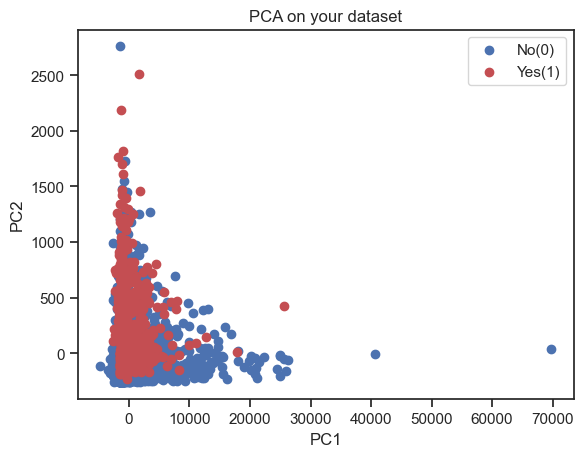

In [51]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca.fit(X)  # train PCA model
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)
print("Singular Values:")
print(pca.singular_values_)
print("Principal Components:")
print(pca.components_)

# Project data onto principal directions
PCscores = pca.transform(X)

# Plot results
colors = ["b", "r"]
target_names = ["No(0)", "Yes(1)"]

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(PCscores[y == i, 0], PCscores[y == i, 1], color=color, label=target_name)

plt.legend()
plt.title("PCA on your dataset")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

<h3>Naive Bayes Classifier </h3>

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

# Create a Naive Bayes model
nb_clf = GaussianNB()

# Train the Naive Bayes model
nb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_clf.predict(X_test)

[[704  99]
 [ 66  36]]
Accuracy = 0.8176795580110497
Precision = 0.5904761904761905
Recall = 0.6148267526188558
F-score = 0.5994511817296627
Support = None


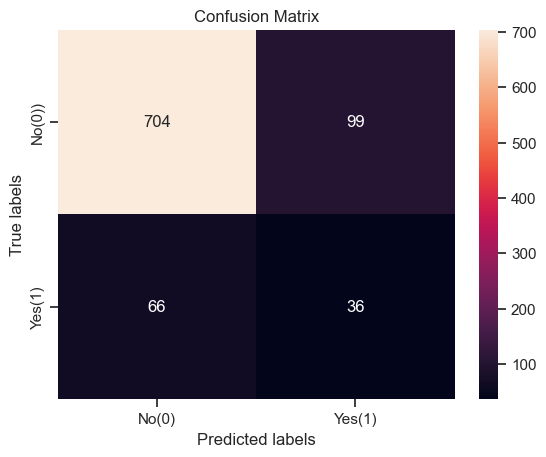

In [53]:
# Evaluating the Naive Bayes model
nb_cm = confusion_matrix(y_test, y_pred)
print(nb_cm)

# Printing Accuracy
print('Accuracy = ' + str(nb_clf.score(X_test,y_test)))

# Metrics for Naive Bayes
nb_metrics = precision_recall_fscore_support(y_test, y_pred, average='macro')
nb_metrics_labels = ['Precision', 'Recall', 'F-score', 'Support']

for i in range(0,len(nb_metrics)):
    print(nb_metrics_labels[i] + ' = ' + str(nb_metrics[i]))

# Confusion Matrix Visualization for Naive Bayes
ax= plt.subplot()
sns.heatmap(nb_cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No(0)', 'Yes(1)'])
ax.yaxis.set_ticklabels(['No(0))', 'Yes(1)'])

plt.show()

<h3>Neural Network classifier</h3>

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

# Create a Neural Network model
nn_clf = MLPClassifier()

# Train the Neural Network model
nn_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nn_clf.predict(X_test)

[[502 301]
 [  7  95]]
Accuracy = 0.6596685082872928
Precision = 0.613073267051656
Recall = 0.7782641076355823
F-score = 0.5733850034283475
Support = None


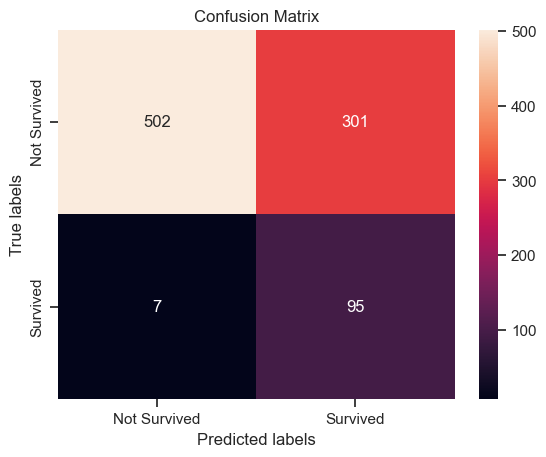

In [55]:
# Evaluating the Neural Network model
nn_cm = confusion_matrix(y_test, y_pred)
print(nn_cm)

# Printing Accuracy
print('Accuracy = ' + str(nn_clf.score(X_test,y_test)))

# Metrics for Neural Network
nn_clf_metrics = precision_recall_fscore_support(y_test, y_pred, average='macro')
nn_clf_metrics_labels = ['Precision', 'Recall', 'F-score', 'Support']

for i in range(0,len(nn_clf_metrics)):
    print(nn_clf_metrics_labels[i] + ' = ' + str(nn_clf_metrics[i]))

# Confusion Matrix Visualization for Neural Network
ax= plt.subplot()
sns.heatmap(nn_cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Survived', 'Survived']); ax.yaxis.set_ticklabels(['Not Survived', 'Survived']);

plt.show()

<h3>Clustering (3d SubTask)</h3> 

<h3>Clustering with K-Means</h3>

In [56]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

# Compute KMeans
db = KMeans(n_clusters=3, max_iter=100).fit(X)

centroids = db.cluster_centers_

labels = db.labels_

# Number of clusters in labels
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Number of iterations: %d' % db.n_iter_)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
print("Mean Squared Error: %0.3f" % db.inertia_)


Number of iterations: 13
Estimated number of clusters: 3
Estimated number of noise points: 0
Silhouette Coefficient: 0.746
Mean Squared Error: 9861881558.127


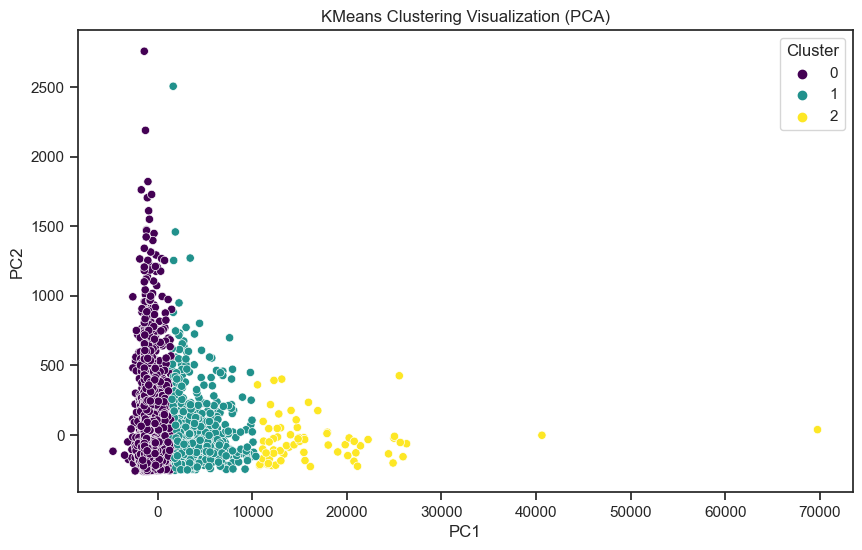

In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Performing PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_pca_clustered = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_clustered['Cluster'] = labels 

# Plot the clusters in 2D space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=X_pca_clustered, palette='viridis', legend='full')
plt.title('KMeans Clustering Visualization (PCA)')
plt.show()


<h3> Clustering with Optics</h3>

In [58]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.cluster import OPTICS
from sklearn import metrics

# Compute OPTICS
clust = OPTICS(min_samples=5, metric = 'euclidean', xi=0.01, min_cluster_size=0.03)


clust.fit(X)

labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=0.5)
labels_100 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=1)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

# Metrics
n_clusters_optics = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_optics = list(labels).count(-1)
silhouette_coefficient = metrics.silhouette_score(X, labels)

print('Estimated number of clusters: %d' % n_clusters_optics)
print('Estimated number of noise points: %d' % n_noise_optics)
print("Silhouette Coefficient: %0.3f" % silhouette_coefficient)

Estimated number of clusters: 3
Estimated number of noise points: 4077
Silhouette Coefficient: -0.021


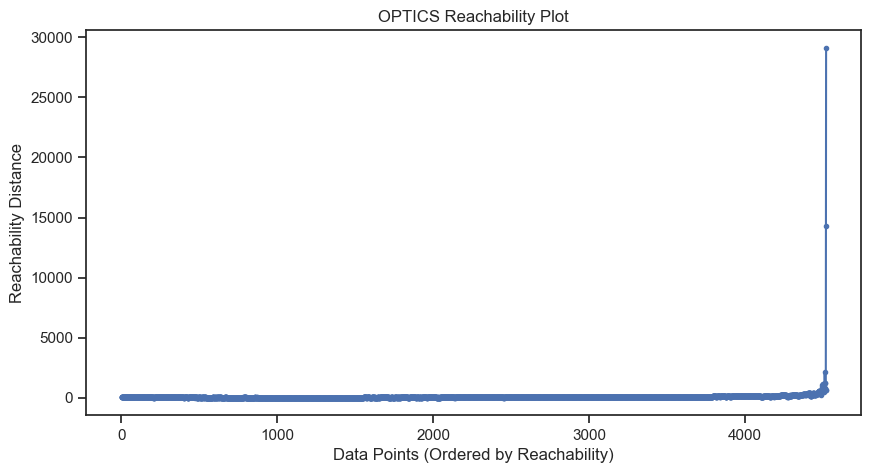

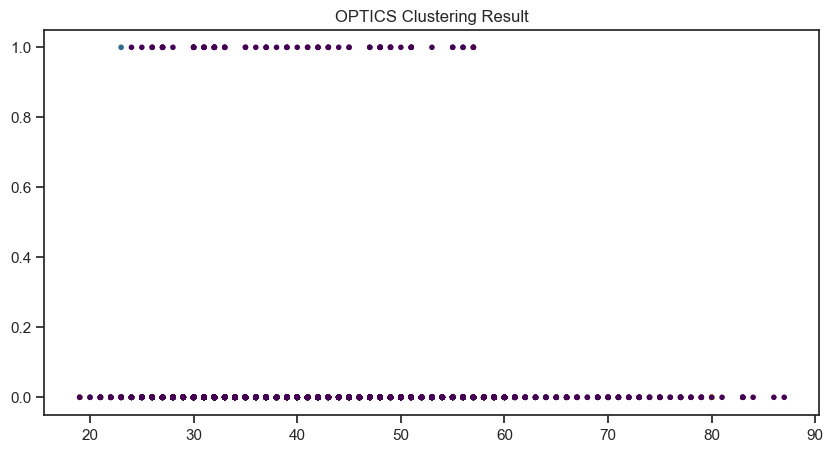

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import OPTICS, cluster_optics_dbscan

# Plotting the reachability plot
plt.figure(figsize=(10, 5))
plt.plot(space, reachability, marker='.')
plt.title('OPTICS Reachability Plot')
plt.xlabel('Data Points (Ordered by Reachability)')
plt.ylabel('Reachability Distance')
plt.show()

# Plotting the resulting clusters
plt.figure(figsize=(10, 5))
colors = labels
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=colors, cmap='viridis', marker='.')
plt.title('OPTICS Clustering Result')
plt.show()


<h3>4th subtask </h3>
<h3>Asosciation Rules / Apriori   </h3>

In [60]:
columns_to_exclude = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Creating a new DataFrame
df4 = df3.drop(columns=columns_to_exclude)

df4.head()


,default,housing,loan,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [62]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df4, min_support=0.05, use_colnames=True)

# Association rules based on confidence metric
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Sorting rules by confidence in descending order
rules = rules.sort_values(by="confidence", ascending=False)

# Displaying the rules with the highest confidences
print("Top 5 Rules with the Highest Confidences:")
print(rules.head(5))


Top 5 Rules with the Highest Confidences:
                                          antecedents            consequents  \
39                            (job_services, housing)  (education_secondary)   
19                                     (job_services)  (education_secondary)   
58                   (marital_single, job_management)   (education_tertiary)   
17                                   (job_management)   (education_tertiary)   
63  (job_blue-collar, marital_married, education_s...              (housing)   

    antecedent support  consequent support   support  confidence      lift  \
39            0.063039            0.531962  0.055298    0.877193  1.648977   
19            0.092900            0.531962  0.081398    0.876190  1.647092   
58            0.065251            0.311436  0.055961    0.857627  2.753787   
17            0.215881            0.311436  0.176731    0.818648  2.628626   
63            0.086928            0.566025  0.068790    0.791349  1.398080   

    leve

/Users/michael/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [77]:
#Displaying the result in better form
rules.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
39,"(job_services, housing)",(education_secondary),0.063039,0.531962,0.055298,0.877193,1.648977,0.021763,3.811167,0.420042
19,(job_services),(education_secondary),0.092900,0.531962,0.081398,0.876190,1.647092,0.031979,3.780307,0.433105
58,"(marital_single, job_management)",(education_tertiary),0.065251,0.311436,0.055961,0.857627,2.753787,0.035640,4.836346,0.681321
17,(job_management),(education_tertiary),0.215881,0.311436,0.176731,0.818648,2.628626,0.109498,3.796830,0.790152
63,"(job_blue-collar, marital_married, education_s...",(housing),0.086928,0.566025,0.068790,0.791349,1.398080,0.019587,2.079904,0.311841
55,"(marital_married, job_management)",(education_tertiary),0.124088,0.311436,0.097766,0.787879,2.529830,0.059121,3.246090,0.690385
38,"(housing, job_management)",(education_tertiary),0.111480,0.311436,0.087812,0.787698,2.529250,0.053094,3.243332,0.680486
34,"(job_blue-collar, education_secondary)",(housing),0.120770,0.566025,0.092015,0.761905,1.346062,0.023656,1.822694,0.292406
30,"(job_blue-collar, housing)",(marital_married),0.153727,0.618668,0.115019,0.748201,1.209374,0.019913,1.514431,0.204574
62,"(job_blue-collar, housing, education_secondary)",(marital_married),0.092015,0.618668,0.068790,0.747596,1.208395,0.011863,1.510799,0.189933


In [66]:
frequent_itemsets.head()

,support,itemsets
0,0.566025,(housing)
1,0.152842,(loan)
2,0.115240,(y)
3,0.211015,(job_blue-collar)
4,0.215881,(job_management)
